In [244]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense, Activation, Dropout
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow

1. Loading Packages and data

In [245]:
dataset_train = pd.read_csv('train.csv')

In [246]:
df = dataset_train
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [247]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)


display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


2. Data Pre-processing

Step 2.1 : Encode Categorical Values - Embarked, Sex

In [248]:
# convert to cateogry dtype
df['Sex'] = df['Sex'].astype('category')
# convert to category codes
df['Sex'] = df['Sex'].cat.codes


# convert to cateogry dtype
df['Embarked'] = df['Embarked'].astype('category')
# convert to category codes
df['Embarked'] = df['Embarked'].cat.codes

In [249]:
df['Age'].mean()

29.69911764705882

In [250]:
mode_value = df['Age'].mean()
df['Age'].fillna(value=mode_value, inplace=True)
print(df.count())

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       891
dtype: int64


<ipython-input-251-1ca7058d8fb1>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


<Axes: >

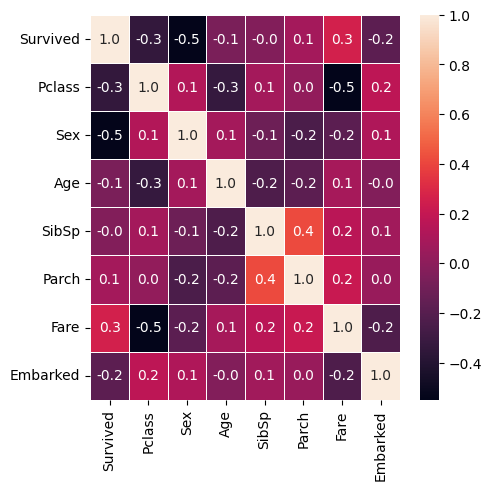

In [251]:
#heatmap for train dataset
df.drop(['PassengerId'], axis=1, inplace=True)

f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [252]:
# drop the variables we won't be using
df.drop(['Cabin', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [253]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [254]:
display_all(df.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Sex,891.0,0.647587,0.477990,0.00,0.0000,1.000000,1.0,1.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


Step 2.2 - Scale Continous Variable

In [255]:
continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))

In [256]:
display_all(df.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.0,-8.772133e-17,1.000562,-1.566107,-0.369365,0.827377,0.827377,0.827377
Sex,891.0,6.475870e-01,0.477990,0.000000,0.000000,1.000000,1.000000,1.000000
Age,891.0,2.232906e-16,1.000562,-2.253155,-0.592481,0.000000,0.407926,3.870872
SibSp,891.0,4.386066e-17,1.000562,-0.474545,-0.474545,-0.474545,0.432793,6.784163
Parch,891.0,5.382900e-17,1.000562,-0.473674,-0.473674,-0.473674,-0.473674,6.974147
Fare,891.0,3.987333e-18,1.000562,-0.648422,-0.489148,-0.357391,-0.024246,9.667167


3. Neural Network

Step 3.1 - Separate features and output labels

In [257]:
X_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']

X_train.shape

(891, 6)

<Axes: >

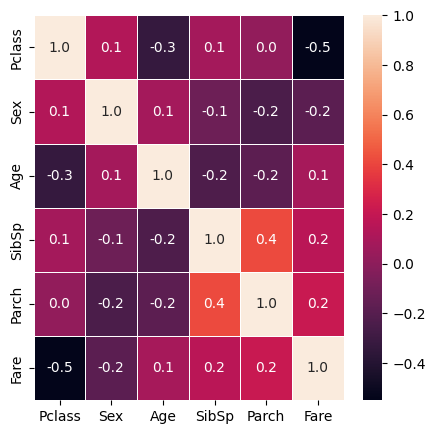

In [258]:
#heatmap for train dataset

f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(X_train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Step 3.2 - Create the model

In [259]:
def model_creation(layers=[8], activation_value='relu', optimizer_val='Adam', dropout=0.0):

    seed(2)
    tensorflow.random.set_seed(2)

    model = Sequential()
    model.add(Dense(layers[0], input_dim=X_train.shape[1], activation=activation_value))

    for i in range(1,len(layers)):
        model.add(Dense(layers[i], activation=activation_value))

    model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer_val, metrics=['accuracy'])

    return model

In [260]:
model = model_creation()
print(model.summary())

Model: "sequential_425"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_872 (Dense)           (None, 8)                 56        
                                                                 
 dropout_425 (Dropout)       (None, 8)                 0         
                                                                 
 dense_873 (Dense)           (None, 1)                 9         
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________
None


Step 3.3 - Train the model

In [261]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_accuracy'])
val_acc_train = np.mean(training.history['accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_acc*100))
print("\n%s: %.2f%%" % ('train_accuracy', val_acc_train*100))


val_accuracy: 83.35%

train_accuracy: 78.49%


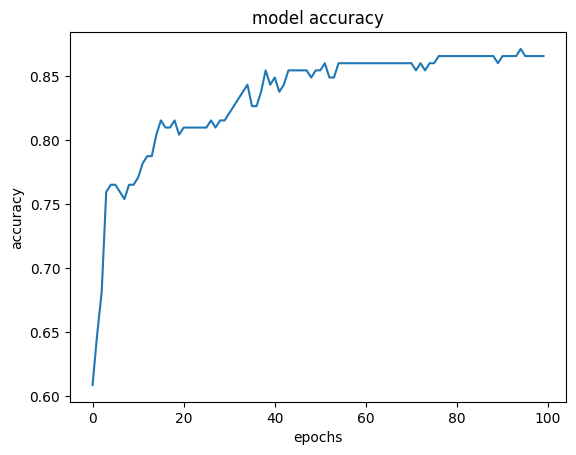

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
#plt.ylim(0.6, 0.90)
plt.xlabel('epochs')
plt.show()

In [263]:
# pip install keras==2.12.0

Grid Search for Batch Size & Epochs

In [264]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=model_creation, verbose=0)

batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)

grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


<ipython-input-264-a6f237ec9018>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=model_creation, verbose=0)


[CV] END ...........................batch_size=16, epochs=50; total time=   3.4s
[CV] END ...........................batch_size=16, epochs=50; total time=   3.4s
[CV] END ...........................batch_size=16, epochs=50; total time=   3.2s
[CV] END ..........................batch_size=16, epochs=100; total time=   5.8s
[CV] END ..........................batch_size=16, epochs=100; total time=   4.9s
[CV] END ..........................batch_size=16, epochs=100; total time=   5.1s
[CV] END ...........................batch_size=32, epochs=50; total time=   3.6s
[CV] END ...........................batch_size=32, epochs=50; total time=   1.9s
[CV] END ...........................batch_size=32, epochs=50; total time=   1.9s
[CV] END ..........................batch_size=32, epochs=100; total time=   3.2s
[CV] END ..........................batch_size=32, epochs=100; total time=   3.2s
[CV] END ..........................batch_size=32, epochs=100; total time=   3.0s
[CV] END ...................

In [265]:
print("Best-Accuracy : %f achieved using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best-Accuracy : 0.806958 achieved using {'batch_size': 32, 'epochs': 100}
0.801347 (0.019244) with: {'batch_size': 16, 'epochs': 50}
0.805836 (0.006919) with: {'batch_size': 16, 'epochs': 100}
0.789001 (0.033595) with: {'batch_size': 32, 'epochs': 50}
0.806958 (0.016798) with: {'batch_size': 32, 'epochs': 100}
0.758698 (0.051162) with: {'batch_size': 64, 'epochs': 50}
0.802469 (0.012397) with: {'batch_size': 64, 'epochs': 100}


In [266]:
print(means)
print(stds)
print(params)
params[0]['batch_size']

[0.80134682 0.80583612 0.78900111 0.80695848 0.75869809 0.80246913]
[0.01924402 0.00691854 0.03359514 0.01679755 0.05116172 0.01239658]
[{'batch_size': 16, 'epochs': 50}, {'batch_size': 16, 'epochs': 100}, {'batch_size': 32, 'epochs': 50}, {'batch_size': 32, 'epochs': 100}, {'batch_size': 64, 'epochs': 50}, {'batch_size': 64, 'epochs': 100}]


16

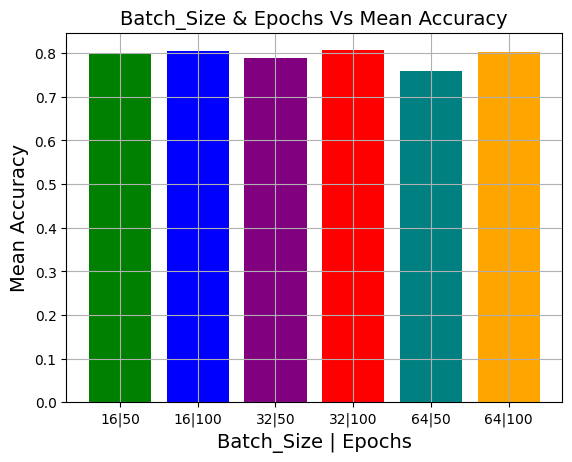

In [267]:
import matplotlib.pyplot as plt

batch_size = ['16|50', '16|100', '32|50', '32|100', '64|50', '64|100']
print()
colors = ['green', 'blue', 'purple', 'red', 'teal', 'orange']
plt.bar(batch_size, means, color=colors)
plt.title('Batch_Size & Epochs Vs Mean Accuracy', fontsize=14)
plt.xlabel('Batch_Size | Epochs', fontsize=14)
plt.ylabel('Mean Accuracy', fontsize=14)
#plt.ylim(0.0, 0.90)
plt.grid(True)
plt.show()

Grid Search for Optimization Algorithm

In [272]:
# create model
model = KerasClassifier(build_fn=model_creation, epochs=100, batch_size=32, verbose=0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
param_grid = dict(optimizer_val=optimizer)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

<ipython-input-272-be7a08d5f91f>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=model_creation, epochs=100, batch_size=32, verbose=0)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ..................................optimizer_val=SGD; total time=   3.1s
[CV] END ..................................optimizer_val=SGD; total time=   3.1s
[CV] END ..................................optimizer_val=SGD; total time=   3.2s
[CV] END ..................................optimizer_val=SGD; total time=   3.1s
[CV] END ..................................optimizer_val=SGD; total time=   3.0s
[CV] END ..............................optimizer_val=RMSprop; total time=   3.1s
[CV] END ..............................optimizer_val=RMSprop; total time=   3.2s
[CV] END ..............................optimizer_val=RMSprop; total time=   3.1s
[CV] END ..............................optimizer_val=RMSprop; total time=   2.9s
[CV] END ..............................optimizer_val=RMSprop; total time=   3.1s
[CV] END ..............................optimizer_val=Adagrad; total time=   5.7s
[CV] END ..............................optimizer_

In [273]:
# summarize results
print("Best-Accuracy: %f achieved using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best-Accuracy: 0.808097 achieved using {'optimizer_val': 'Adam'}
0.787910 (0.035562) with: {'optimizer_val': 'SGD'}
0.805844 (0.030634) with: {'optimizer_val': 'RMSprop'}
0.618348 (0.166959) with: {'optimizer_val': 'Adagrad'}
0.505103 (0.095324) with: {'optimizer_val': 'Adadelta'}
0.808097 (0.026787) with: {'optimizer_val': 'Adam'}
0.801362 (0.016308) with: {'optimizer_val': 'Nadam'}


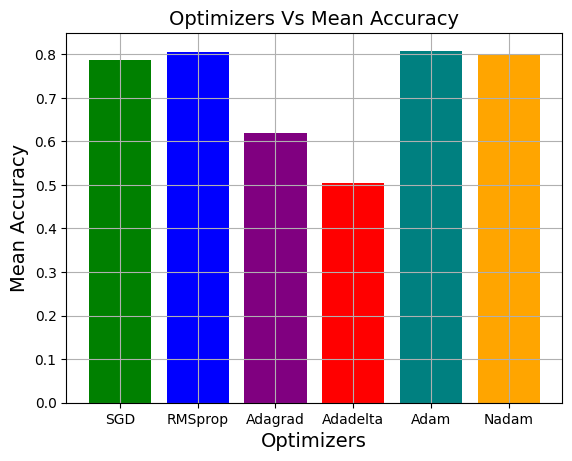

In [274]:
import matplotlib.pyplot as plt

optimizer_val = []
for param in params:
  optimizer_val.append(param['optimizer_val'])
colors = ['green', 'blue', 'purple', 'red', 'teal', 'orange']
plt.bar(optimizer_val, means, color=colors)
plt.title('Optimizers Vs Mean Accuracy', fontsize=14)
plt.xlabel('Optimizers', fontsize=14)
plt.ylabel('Mean Accuracy', fontsize=14)
plt.grid(True)
plt.show()

Grid Search for Hidden Neurons

In [280]:
seed(2)
tensorflow.random.set_seed(2)

# create model
model = KerasClassifier(build_fn=model_creation,
                        epochs=100, batch_size=32, verbose=0)

# define the grid search parameters
layers = [[8],[10],[10,5],[12,6],[12,8,4]]
param_grid = dict(layers=layers)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

<ipython-input-280-228ab9994382>:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=model_creation,


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END .........................................layers=[8]; total time=   5.9s
[CV] END .........................................layers=[8]; total time=   3.2s
[CV] END .........................................layers=[8]; total time=   3.2s
[CV] END .........................................layers=[8]; total time=   5.9s
[CV] END .........................................layers=[8]; total time=   3.2s
[CV] END ........................................layers=[10]; total time=   3.2s
[CV] END ........................................layers=[10]; total time=   5.9s
[CV] END ........................................layers=[10]; total time=   3.0s
[CV] END ........................................layers=[10]; total time=   3.1s
[CV] END ........................................layers=[10]; total time=   5.8s
[CV] END .....................................layers=[10, 5]; total time=   5.8s
[CV] END .....................................lay

In [281]:
# summarize results
print("Best-Accuracy: %f achieved using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best-Accuracy: 0.815956 achieved using {'layers': [12, 6]}
0.809208 (0.030320) with: {'layers': [8]}
0.804727 (0.024607) with: {'layers': [10]}
0.801350 (0.015281) with: {'layers': [10, 5]}
0.815956 (0.030102) with: {'layers': [12, 6]}
0.809196 (0.021377) with: {'layers': [12, 8, 4]}


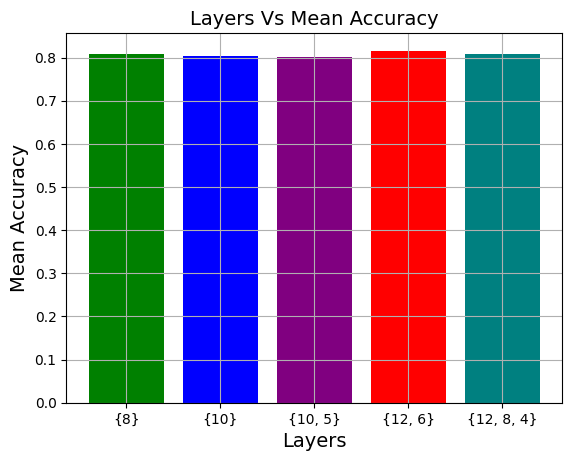

In [282]:
import matplotlib.pyplot as plt

opt = ['{8}', '{10}', '{10, 5}', '{12, 6}', '{12, 8, 4}']
colors = ['green', 'blue', 'purple', 'red', 'teal']
plt.bar(opt, means, color=colors)
plt.title('Layers Vs Mean Accuracy', fontsize=14)
plt.xlabel('Layers', fontsize=14)
plt.ylabel('Mean Accuracy', fontsize=14)
plt.grid(True)
plt.show()

Grid Search for Dropout

In [283]:
model = KerasClassifier(build_fn=model_creation,
                        epochs=100, batch_size=32, verbose=0)

drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.5]
param_grid = dict(dropout=drops)
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(X_train, y_train)

<ipython-input-283-4bb7e4345ead>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=model_creation,


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ........................................dropout=0.0; total time=   3.2s
[CV] END ........................................dropout=0.0; total time=   5.9s
[CV] END ........................................dropout=0.0; total time=   3.2s
[CV] END ........................................dropout=0.0; total time=   3.2s
[CV] END ........................................dropout=0.0; total time=   5.7s
[CV] END .......................................dropout=0.01; total time=   3.3s
[CV] END .......................................dropout=0.01; total time=   5.7s
[CV] END .......................................dropout=0.01; total time=   3.2s
[CV] END .......................................dropout=0.01; total time=   5.8s
[CV] END .......................................dropout=0.01; total time=   5.8s
[CV] END .......................................dropout=0.05; total time=   5.7s
[CV] END .......................................d

In [284]:
# summarize results
print("Best-Accuracy: %f achieved using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best-Accuracy: 0.813703 achieved using {'dropout': 0.01}
0.809227 (0.031814) with: {'dropout': 0.0}
0.813703 (0.023586) with: {'dropout': 0.01}
0.801343 (0.028579) with: {'dropout': 0.05}
0.808091 (0.035184) with: {'dropout': 0.1}
0.805831 (0.026761) with: {'dropout': 0.2}
0.797947 (0.033308) with: {'dropout': 0.5}


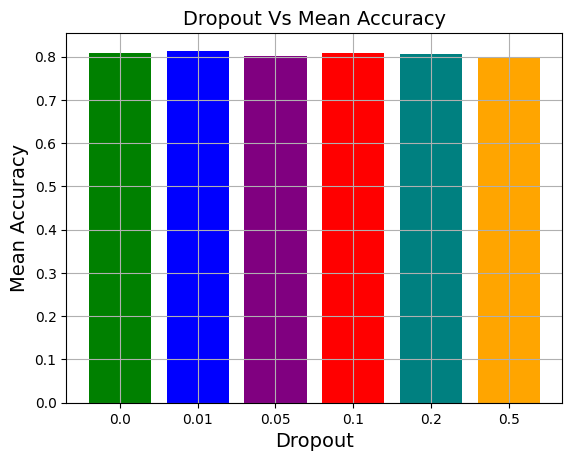

In [285]:
import matplotlib.pyplot as plt

dropout = ['0.0', '0.01', '0.05', '0.1', '0.2', '0.5']
colors = ['green', 'blue', 'purple', 'red', 'teal', 'orange']
plt.bar(dropout, means, color=colors)
plt.title('Dropout Vs Mean Accuracy', fontsize=14)
plt.xlabel('Dropout', fontsize=14)
plt.ylabel('Mean Accuracy', fontsize=14)
plt.grid(True)
plt.show()

In [302]:
# create final model
model = model_creation(layers=[12, 6], dropout=0.01)

print(model.summary())

Model: "sequential_632"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1356 (Dense)          (None, 12)                84        
                                                                 
 dense_1357 (Dense)          (None, 6)                 78        
                                                                 
 dropout_632 (Dropout)       (None, 6)                 0         
                                                                 
 dense_1358 (Dense)          (None, 1)                 7         
                                                                 
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________
None


In [303]:
# train model on full train set, with 80/20 CV split
training = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
val_acc = np.mean(training.history['val_accuracy'])
val_acc_train = np.mean(training.history['accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_acc*100))
print("\n%s: %.2f%%" % ('train_accuracy', val_acc_train*100))


val_accuracy: 82.34%

train_accuracy: 79.32%


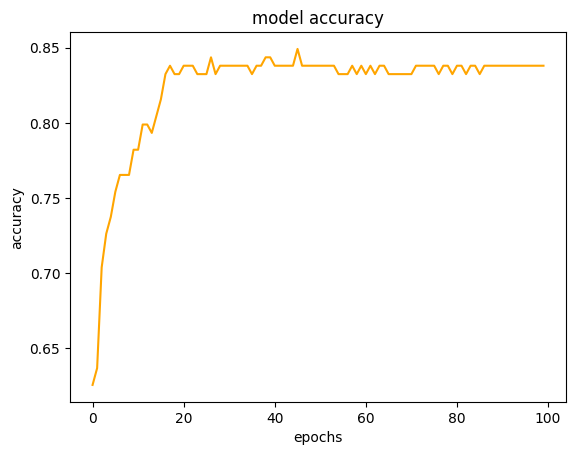

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt
# summarize history for accuracy
#plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'], color='orange')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
#plt.limit()
#plt.legend(['train', 'validation'], loc='upper left')
plt.show()